# 🏎️ Lamborghini Stock Market Analysis (1980-2025)

## Comprehensive Financial Performance Analysis

---

### 📊 Project Overview

This notebook provides a comprehensive analysis of Lamborghini's stock market performance over 45 years (1980-2025). We'll explore:

- **Price Trends & Evolution**: How the stock price has changed over decades
- **Volatility Analysis**: Risk assessment and market stability
- **Financial Metrics**: PE Ratio, Market Cap, and Dividend Analysis
- **Returns Analysis**: Daily and Monthly Returns
- **Decade-wise Comparison**: Performance across different economic periods
- **Predictive Modeling**: Time-series forecasting for future prices

---

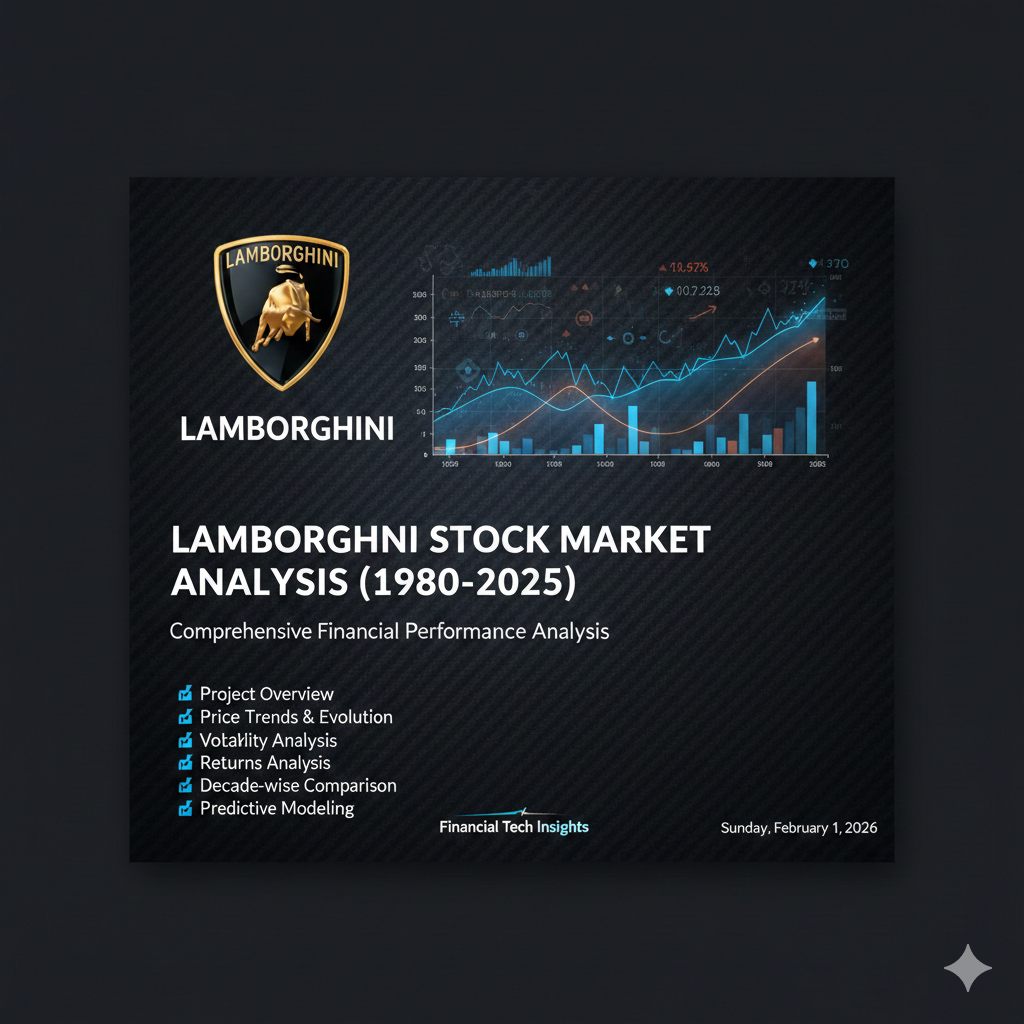

In [25]:
from IPython.display import Image
Image(filename = "Lamborghini_Stock_Analysis.png")


## 1. 📚 Import Libraries and Load Data

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Statistical Analysis
from scipy import stats
from scipy.stats import normaltest

# Time Series Analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Set Style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Display Settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


In [2]:
# Load the dataset
df = pd.read_csv('lamborghini_stock_data.csv')

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set Date as index
df.set_index('Date', inplace=True)

# Display basic information
print("📊 Dataset Loaded Successfully!")
print(f"\n📈 Dataset Shape: {df.shape}")
print(f"📅 Date Range: {df.index.min()} to {df.index.max()}")
print(f"\n🔍 First Few Rows:")
df.head(10)

📊 Dataset Loaded Successfully!

📈 Dataset Shape: (552, 19)
📅 Date Range: 1980-01-01 00:00:00 to 2025-12-01 00:00:00

🔍 First Few Rows:


,Year,Month,Open,High,Low,Close,Adj Close,Volume,Dividend,Stock Split,PE Ratio,Market Cap ($M),52W High,52W Low,Volatility (%),Trading Volume (M),Decade,Daily Return (%),Monthly Return ($)
Date,,,,,,,,,,,,,,,,,,,
1980-01-01,1980,1,2.56,2.60,2.51,2.58,2.59,37598928,0.0,NaN,14.0,97.0,2.97,2.19,27.66,37.60,1980s,NaN,NaN
1980-02-01,1980,2,2.31,2.32,2.29,2.31,2.32,37570403,0.0,NaN,21.6,86.8,2.66,1.96,28.48,37.57,1980s,-10.465116,-0.27
1980-03-01,1980,3,2.53,2.55,2.47,2.51,2.50,15449461,0.0,NaN,34.0,38.7,2.88,2.13,25.10,15.45,1980s,8.658009,0.20
1980-04-01,1980,4,2.37,2.41,2.30,2.35,2.36,36985658,0.0,NaN,14.9,86.9,2.70,2.00,42.67,36.99,1980s,-6.374502,-0.16
1980-05-01,1980,5,2.38,2.43,2.34,2.37,2.36,5667767,0.0,NaN,13.1,13.4,2.73,2.02,21.84,5.67,1980s,0.851064,0.02
1980-06-01,1980,6,2.45,2.48,2.42,2.47,2.47,25483473,0.0,NaN,15.7,62.8,2.83,2.10,25.66,25.48,1980s,4.219409,0.10
1980-07-01,1980,7,2.74,2.76,2.68,2.73,2.73,17428983,0.0,NaN,15.8,47.6,3.14,2.32,26.38,17.43,1980s,10.526316,0.26
1980-08-01,1980,8,2.90,2.95,2.83,2.89,2.91,16371155,0.0,NaN,30.9,47.4,3.33,2.46,39.15,16.37,1980s,5.860806,0.16
1980-09-01,1980,9,2.58,2.62,2.50,2.55,2.53,34502842,0.0,NaN,21.1,88.0,2.93,2.17,42.44,34.50,1980s,-11.764706,-0.34


## 2. 🔍 Data Exploration & Quality Assessment

In [3]:
# Dataset Information
print("=" * 80)
print("📋 DATASET INFORMATION")
print("=" * 80)
df.info()

📋 DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 552 entries, 1980-01-01 to 2025-12-01
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                552 non-null    int64  
 1   Month               552 non-null    int64  
 2   Open                552 non-null    float64
 3   High                552 non-null    float64
 4   Low                 552 non-null    float64
 5   Close               552 non-null    float64
 6   Adj Close           552 non-null    float64
 7   Volume              552 non-null    int64  
 8   Dividend            552 non-null    float64
 9   Stock Split         24 non-null     object 
 10  PE Ratio            552 non-null    float64
 11  Market Cap ($M)     552 non-null    float64
 12  52W High            552 non-null    float64
 13  52W Low             552 non-null    float64
 14  Volatility (%)      552 non-null    float64
 15  Trading Volume (

In [4]:
# Statistical Summary
print("=" * 80)
print("📊 STATISTICAL SUMMARY")
print("=" * 80)
df.describe().round(2)

📊 STATISTICAL SUMMARY


,Year,Month,Open,High,Low,Close,Adj Close,Volume,Dividend,PE Ratio,Market Cap ($M),52W High,52W Low,Volatility (%),Trading Volume (M),Daily Return (%),Monthly Return ($)
count,552.00,552.00,552.00,552.00,552.00,552.00,552.00,552.00,552.00,552.00,552.00,552.00,552.00,552.00,552.00,551.00,551.00
mean,2002.50,6.50,11.06,11.27,10.85,11.05,11.05,26674626.38,0.07,23.67,294.06,12.71,9.39,30.80,26.67,0.43,0.03
std,13.29,3.46,4.99,5.07,4.89,4.98,4.97,13948534.05,0.10,6.64,219.90,5.72,4.23,8.53,13.95,3.51,0.29
min,1980.00,1.00,2.31,2.32,2.29,2.31,2.32,1048306.00,0.00,12.10,6.90,2.66,1.96,15.03,1.05,-11.76,-0.82
25%,1991.00,3.75,6.62,6.78,6.53,6.68,6.68,14751272.75,0.00,17.70,117.65,7.69,5.68,23.55,14.75,-1.58,-0.17
50%,2002.50,6.50,11.14,11.40,10.95,11.12,11.12,27415189.00,0.00,23.65,232.85,12.79,9.45,31.02,27.42,0.21,0.02
75%,2014.00,9.25,15.44,15.73,15.14,15.45,15.39,38339791.25,0.12,29.22,417.48,17.77,13.14,38.17,38.34,2.33,0.23
max,2025.00,12.00,20.07,20.31,19.68,19.95,19.93,49987726.00,0.35,35.00,933.60,22.94,16.96,45.00,49.99,15.73,0.85


In [5]:
# Missing Values Analysis
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing Count': df.isnull().sum(),
    'Missing Percentage': (df.isnull().sum() / len(df)) * 100
})
missing_data = missing_data[missing_data['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_data) > 0:
    print("⚠️ Missing Values Found:")
    print(missing_data)
else:
    print("✅ No Missing Values Found!")

⚠️ Missing Values Found:
                                Column  Missing Count  Missing Percentage
Stock Split                Stock Split            528           95.652174
Daily Return (%)      Daily Return (%)              1            0.181159
Monthly Return ($)  Monthly Return ($)              1            0.181159


## 3. 📈 Price Trends Analysis

In [6]:
# Create comprehensive price trend visualization
fig = make_subplots(
    rows=2, cols=1,
    subplot_titles=('Stock Price Evolution (1980-2025)', 'Price Range (High-Low)'),
    vertical_spacing=0.1,
    row_heights=[0.7, 0.3]
)

# Main price line
fig.add_trace(
    go.Scatter(
        x=df.index,
        y=df['Close'],
        mode='lines',
        name='Closing Price',
        line=dict(color='#FF6B35', width=2),
        fill='tonexty'
    ),
    row=1, col=1
)

# High-Low range
fig.add_trace(
    go.Scatter(
        x=df.index,
        y=df['High'] - df['Low'],
        mode='lines',
        name='Price Range',
        line=dict(color='#4ECDC4', width=1),
        fill='tozeroy'
    ),
    row=2, col=1
)

fig.update_layout(
    title='🏎️ Lamborghini Stock Price Analysis (1980-2025)',
    height=800,
    showlegend=True,
    template='plotly_dark'
)

fig.update_xaxes(title_text="Date", row=2, col=1)
fig.update_yaxes(title_text="Price ($)", row=1, col=1)
fig.update_yaxes(title_text="Range ($)", row=2, col=1)

fig.show()

📊 Price Statistics by Decade:
        Mean Price  Std Dev  Min Price  Max Price  Median Price
Decade                                                         
1980s         4.31     1.09       2.31       6.31          4.29
1990s         8.05     1.12       6.14      10.06          8.04
2000s        11.81     1.09       9.77      13.70         11.72
2010s        15.55     1.04      13.63      17.61         15.60
2020s        18.53     0.68      17.36      19.95         18.50


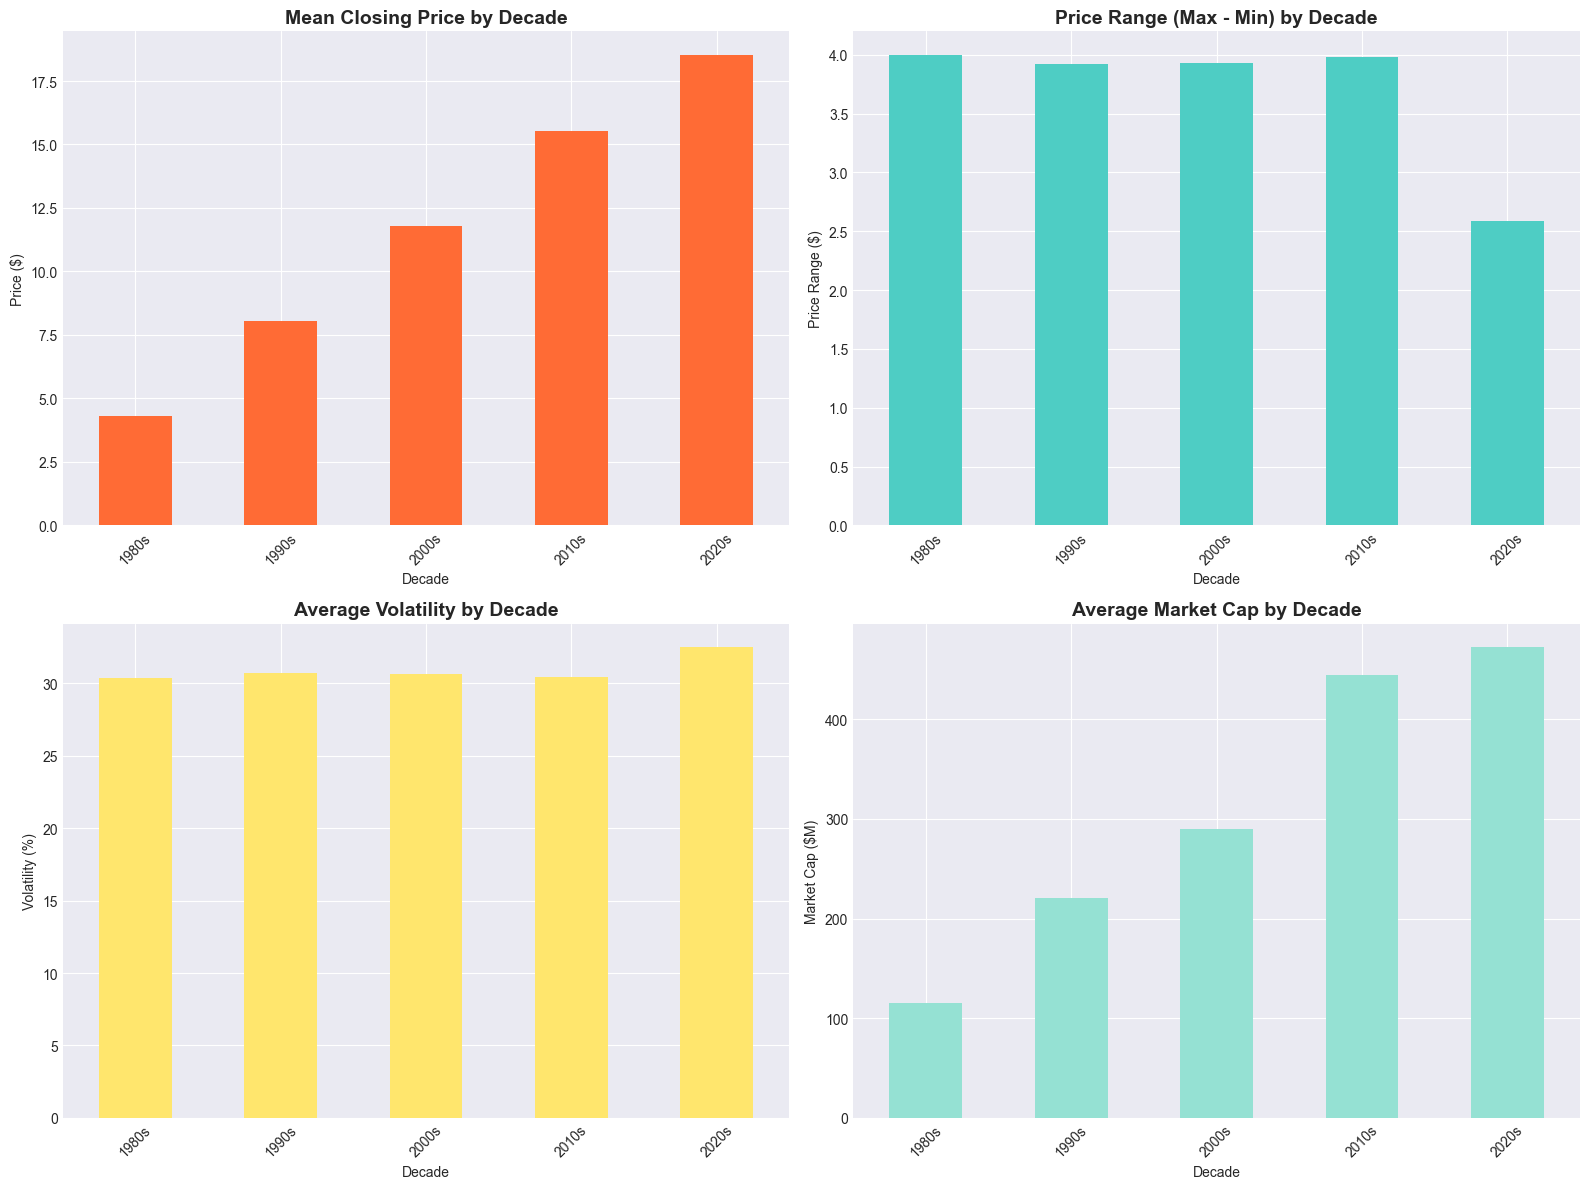

In [7]:
# Price Statistics by Decade
decade_stats = df.groupby('Decade')['Close'].agg([
    'mean', 'std', 'min', 'max', 'median'
]).round(2)
decade_stats.columns = ['Mean Price', 'Std Dev', 'Min Price', 'Max Price', 'Median Price']

print("📊 Price Statistics by Decade:")
print("=" * 80)
print(decade_stats)

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Mean Price by Decade
decade_stats['Mean Price'].plot(kind='bar', ax=axes[0, 0], color='#FF6B35')
axes[0, 0].set_title('Mean Closing Price by Decade', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Price ($)')
axes[0, 0].tick_params(axis='x', rotation=45)

# Price Range by Decade
(decade_stats['Max Price'] - decade_stats['Min Price']).plot(kind='bar', ax=axes[0, 1], color='#4ECDC4')
axes[0, 1].set_title('Price Range (Max - Min) by Decade', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Price Range ($)')
axes[0, 1].tick_params(axis='x', rotation=45)

# Volatility by Decade
df.groupby('Decade')['Volatility (%)'].mean().plot(kind='bar', ax=axes[1, 0], color='#FFE66D')
axes[1, 0].set_title('Average Volatility by Decade', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Volatility (%)')
axes[1, 0].tick_params(axis='x', rotation=45)

# Market Cap by Decade
df.groupby('Decade')['Market Cap ($M)'].mean().plot(kind='bar', ax=axes[1, 1], color='#95E1D3')
axes[1, 1].set_title('Average Market Cap by Decade', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Market Cap ($M)')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 4. 💹 Returns Analysis

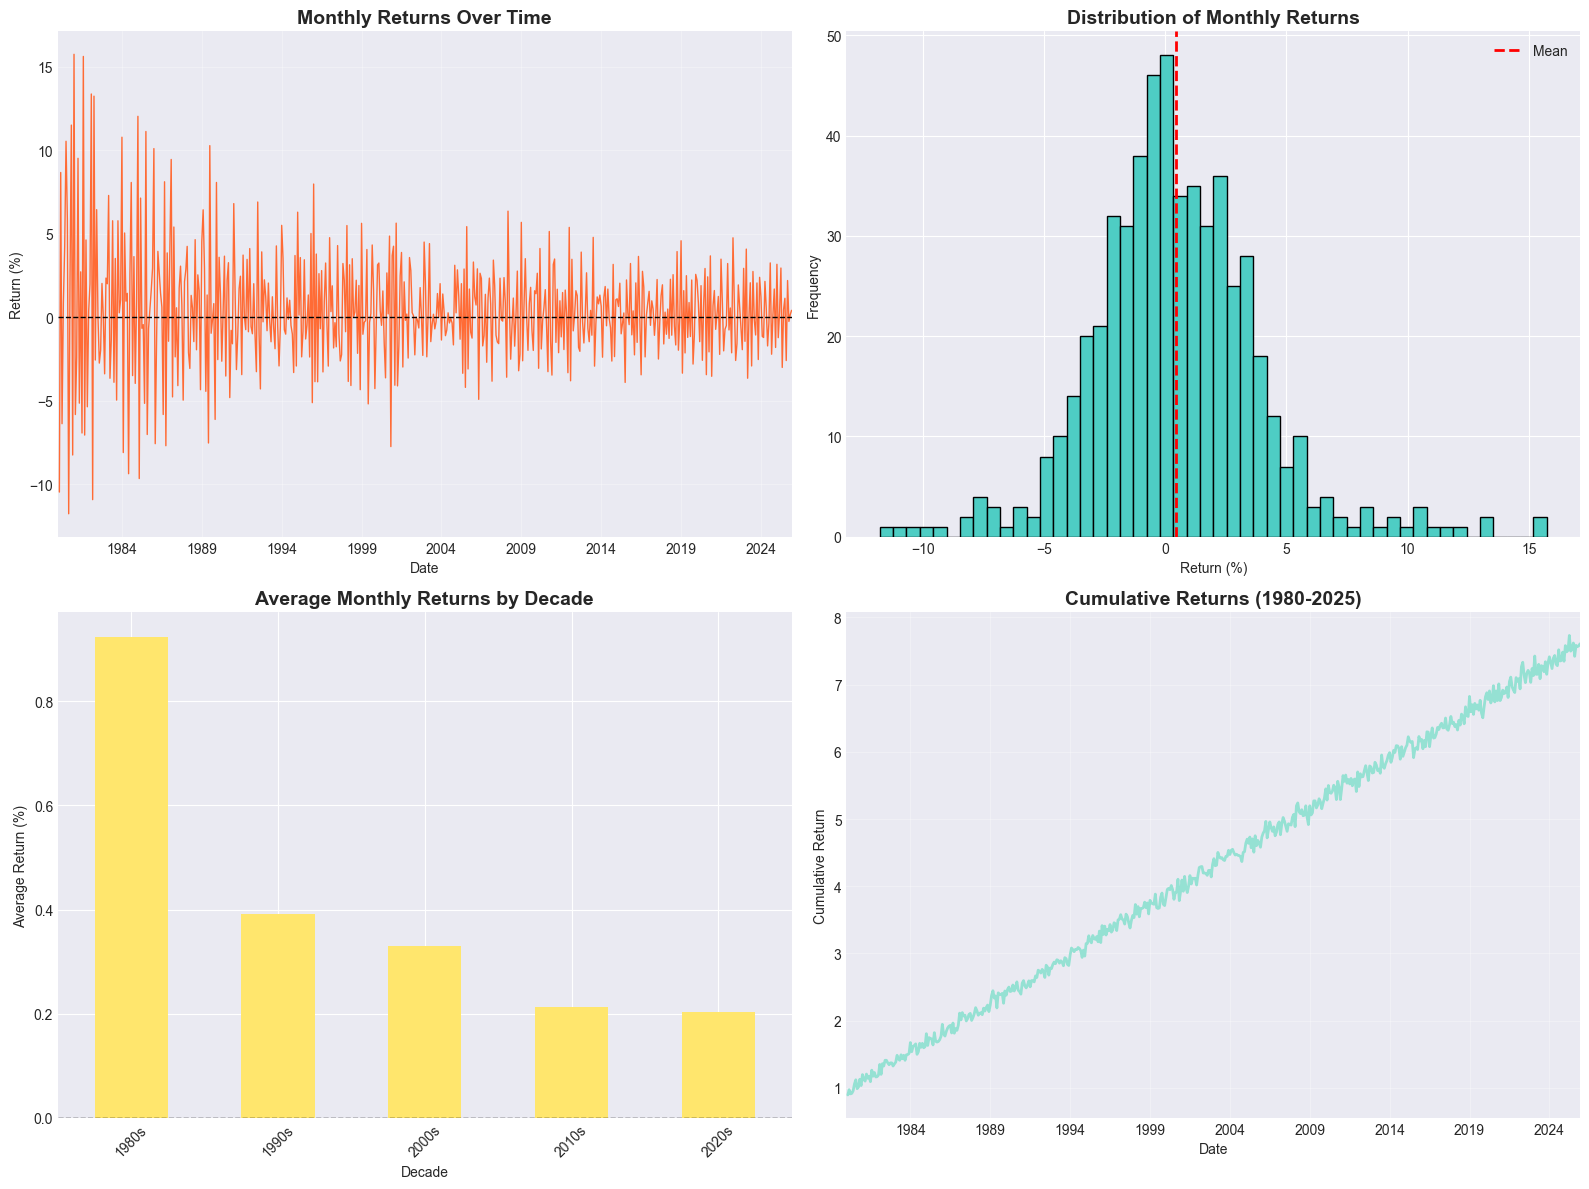

📊 Returns Statistics:
count    551.000000
mean       0.429800
std        3.513673
min      -11.764706
25%       -1.578526
50%        0.208189
75%        2.326533
max       15.730337
Name: Monthly_Return_Pct, dtype: float64

📈 Total Return: 660.85%
📈 Annualized Return: 4.51%


In [8]:
# Calculate additional returns if needed
df['Monthly_Return_Pct'] = df['Close'].pct_change() * 100

# Returns Distribution
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Monthly Returns Over Time
df['Monthly_Return_Pct'].plot(ax=axes[0, 0], color='#FF6B35', linewidth=1)
axes[0, 0].axhline(y=0, color='black', linestyle='--', linewidth=1)
axes[0, 0].set_title('Monthly Returns Over Time', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Return (%)')
axes[0, 0].grid(True, alpha=0.3)

# Returns Distribution
df['Monthly_Return_Pct'].dropna().hist(bins=50, ax=axes[0, 1], color='#4ECDC4', edgecolor='black')
axes[0, 1].axvline(x=df['Monthly_Return_Pct'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
axes[0, 1].set_title('Distribution of Monthly Returns', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Return (%)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()

# Returns by Decade
df.groupby('Decade')['Monthly_Return_Pct'].mean().plot(kind='bar', ax=axes[1, 0], color='#FFE66D')
axes[1, 0].set_title('Average Monthly Returns by Decade', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Average Return (%)')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].axhline(y=0, color='black', linestyle='--', linewidth=1)

# Cumulative Returns
cumulative_returns = (1 + df['Monthly_Return_Pct'] / 100).cumprod()
cumulative_returns.plot(ax=axes[1, 1], color='#95E1D3', linewidth=2)
axes[1, 1].set_title('Cumulative Returns (1980-2025)', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Cumulative Return')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Returns Statistics
print("📊 Returns Statistics:")
print("=" * 80)
returns_stats = df['Monthly_Return_Pct'].describe()
print(returns_stats)
print(f"\n📈 Total Return: {((df['Close'][-1] / df['Close'][0]) - 1) * 100:.2f}%")
print(f"📈 Annualized Return: {((df['Close'][-1] / df['Close'][0]) ** (12/len(df)) - 1) * 100:.2f}%")

## 5. 📊 Financial Metrics Analysis

In [9]:
# Financial Metrics Visualization
fig = make_subplots(
    rows=3, cols=1,
    subplot_titles=('Market Capitalization Over Time', 'PE Ratio Over Time', 'Dividend History'),
    vertical_spacing=0.08,
    row_heights=[0.4, 0.3, 0.3]
)

# Market Cap
fig.add_trace(
    go.Scatter(
        x=df.index,
        y=df['Market Cap ($M)'],
        mode='lines',
        name='Market Cap',
        line=dict(color='#FF6B35', width=2),
        fill='tozeroy'
    ),
    row=1, col=1
)

# PE Ratio
fig.add_trace(
    go.Scatter(
        x=df.index,
        y=df['PE Ratio'],
        mode='lines',
        name='PE Ratio',
        line=dict(color='#4ECDC4', width=2)
    ),
    row=2, col=1
)

# Dividends
fig.add_trace(
    go.Bar(
        x=df.index,
        y=df['Dividend'],
        name='Dividend',
        marker_color='#FFE66D'
    ),
    row=3, col=1
)

fig.update_layout(
    title='💰 Financial Metrics Analysis',
    height=900,
    showlegend=True,
    template='plotly_dark'
)

fig.update_yaxes(title_text="Market Cap ($M)", row=1, col=1)
fig.update_yaxes(title_text="PE Ratio", row=2, col=1)
fig.update_yaxes(title_text="Dividend ($)", row=3, col=1)
fig.update_xaxes(title_text="Date", row=3, col=1)

fig.show()

📊 Stock Split Events:
Date: 2015-01-01 | Split: 2:1 | Price: $15.64
Date: 2015-02-01 | Split: 2:1 | Price: $15.74
Date: 2015-03-01 | Split: 2:1 | Price: $16.06
Date: 2015-04-01 | Split: 2:1 | Price: $15.90
Date: 2015-05-01 | Split: 2:1 | Price: $15.84
Date: 2015-06-01 | Split: 2:1 | Price: $15.88
Date: 2015-07-01 | Split: 2:1 | Price: $15.26
Date: 2015-08-01 | Split: 2:1 | Price: $15.60
Date: 2015-09-01 | Split: 2:1 | Price: $15.64
Date: 2015-10-01 | Split: 2:1 | Price: $15.57
Date: 2015-11-01 | Split: 2:1 | Price: $16.07
Date: 2015-12-01 | Split: 2:1 | Price: $15.90
Date: 2020-01-01 | Split: 3:1 | Price: $17.60
Date: 2020-02-01 | Split: 3:1 | Price: $17.75
Date: 2020-03-01 | Split: 3:1 | Price: $17.49
Date: 2020-04-01 | Split: 3:1 | Price: $17.82
Date: 2020-05-01 | Split: 3:1 | Price: $17.36
Date: 2020-06-01 | Split: 3:1 | Price: $17.51
Date: 2020-07-01 | Split: 3:1 | Price: $18.02
Date: 2020-08-01 | Split: 3:1 | Price: $17.40
Date: 2020-09-01 | Split: 3:1 | Price: $17.82
Date: 2020-1

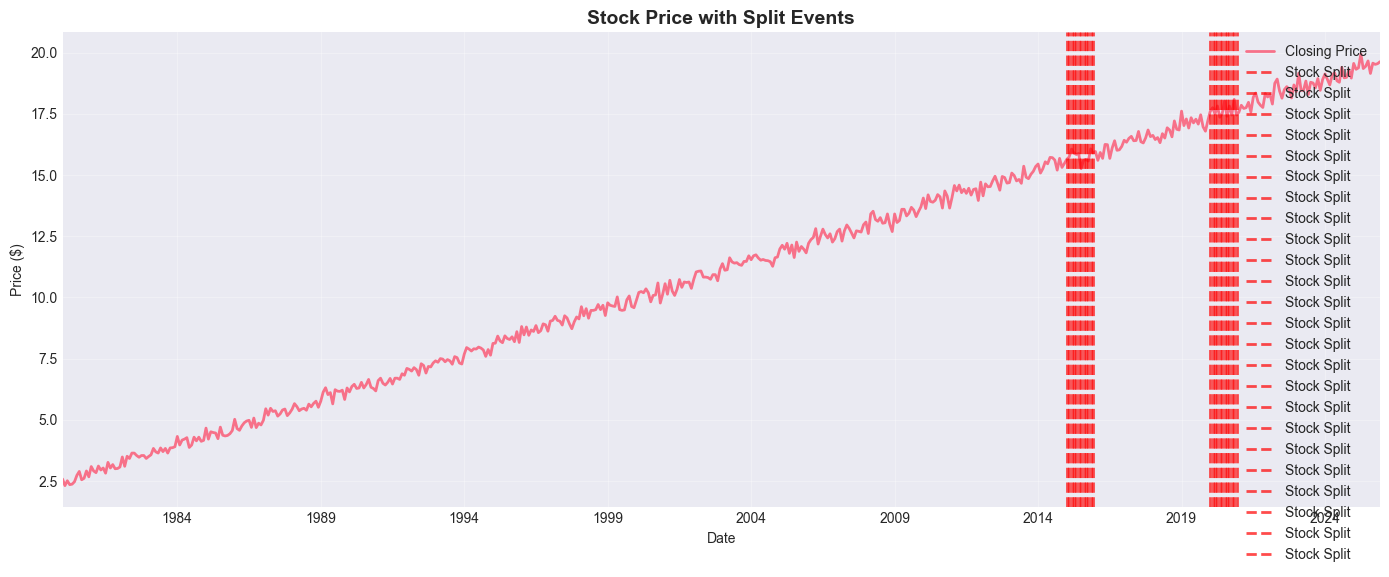

In [10]:
# Stock Split Analysis
splits = df[df['Stock Split'].notna()]
if len(splits) > 0:
    print("📊 Stock Split Events:")
    print("=" * 80)
    for idx, row in splits.iterrows():
        print(f"Date: {idx.strftime('%Y-%m-%d')} | Split: {row['Stock Split']} | Price: ${row['Close']:.2f}")
    
    # Visualize price around splits
    fig, ax = plt.subplots(figsize=(14, 6))
    df['Close'].plot(ax=ax, label='Closing Price', linewidth=2)
    for idx in splits.index:
        ax.axvline(x=idx, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Stock Split')
    ax.set_title('Stock Price with Split Events', fontsize=14, fontweight='bold')
    ax.set_ylabel('Price ($)')
    ax.legend()
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("No stock splits recorded in the dataset.")

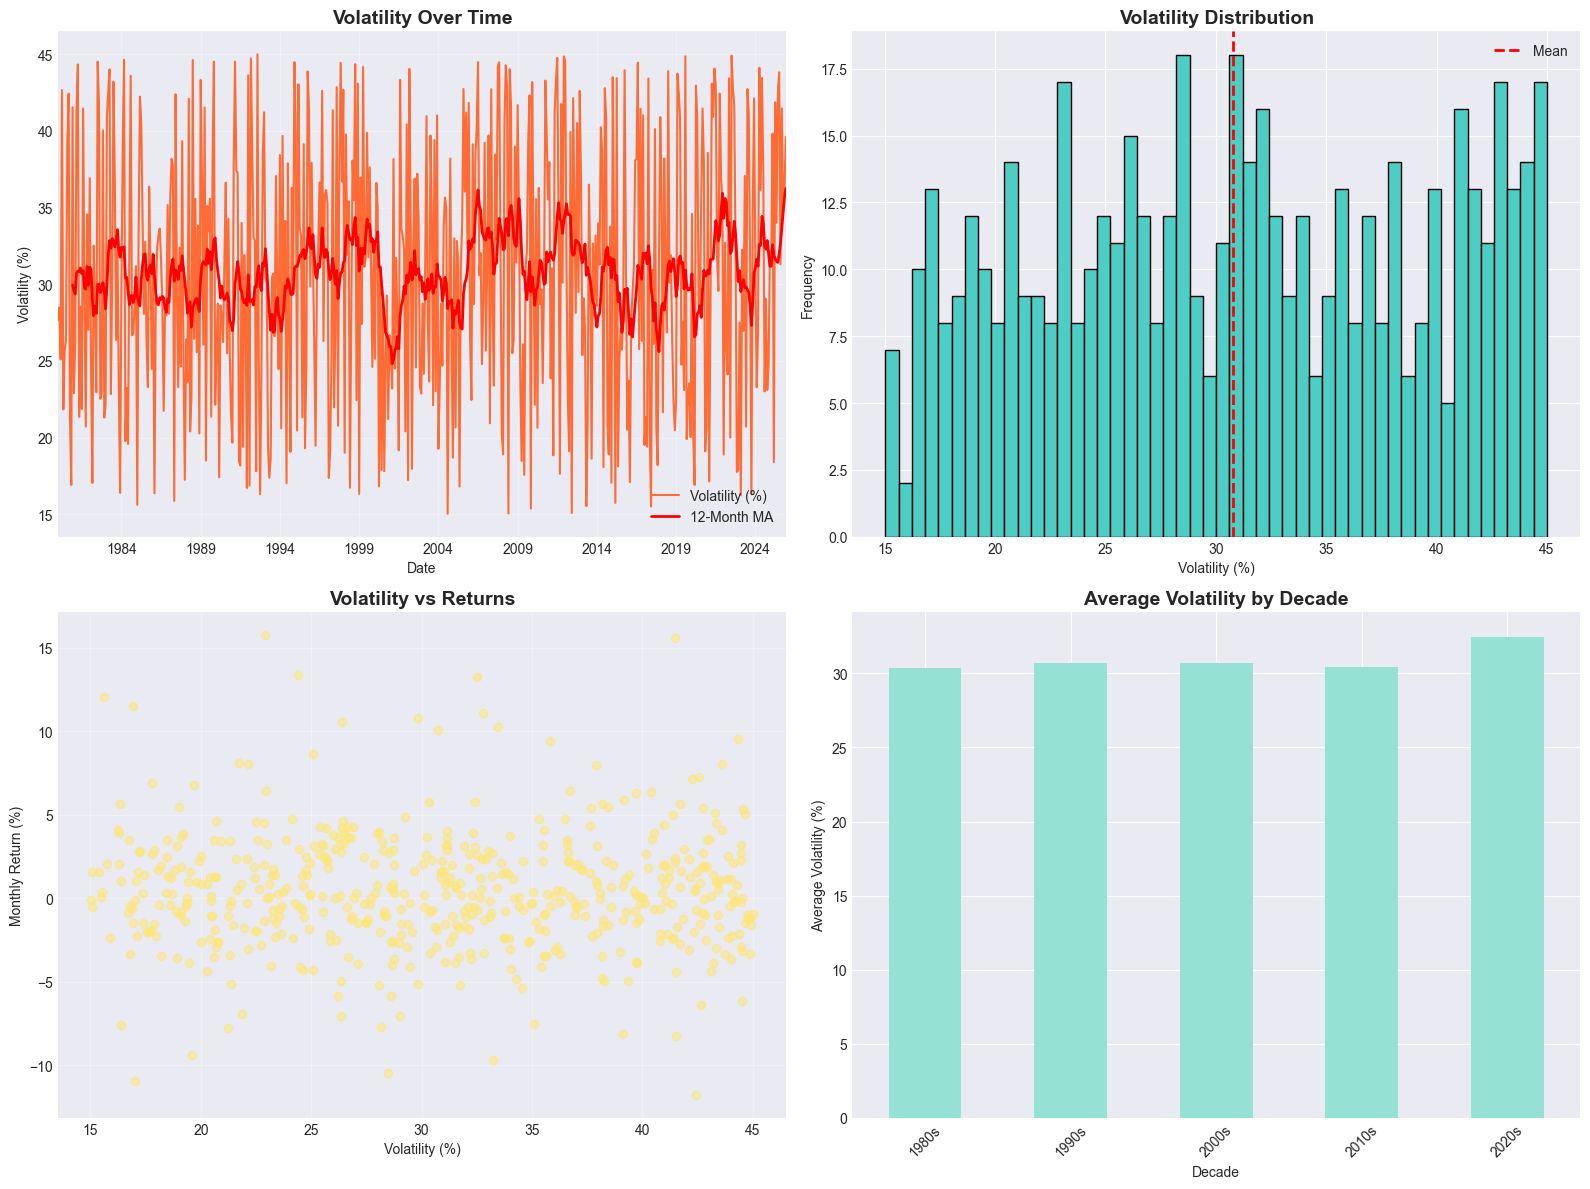

📊 Volatility Statistics:
Mean Volatility: 30.80%
Median Volatility: 31.02%
Max Volatility: 45.00%
Min Volatility: 15.03%


In [11]:
# Volatility Analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Volatility Over Time
df['Volatility (%)'].plot(ax=axes[0, 0], color='#FF6B35', linewidth=1.5)
df['Volatility (%)'].rolling(window=12).mean().plot(ax=axes[0, 0], color='red', linewidth=2, label='12-Month MA')
axes[0, 0].set_title('Volatility Over Time', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Volatility (%)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Volatility Distribution
df['Volatility (%)'].hist(bins=50, ax=axes[0, 1], color='#4ECDC4', edgecolor='black')
axes[0, 1].axvline(x=df['Volatility (%)'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
axes[0, 1].set_title('Volatility Distribution', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Volatility (%)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()

# Volatility vs Returns
axes[1, 0].scatter(df['Volatility (%)'], df['Monthly_Return_Pct'], alpha=0.5, color='#FFE66D')
axes[1, 0].set_title('Volatility vs Returns', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Volatility (%)')
axes[1, 0].set_ylabel('Monthly Return (%)')
axes[1, 0].grid(True, alpha=0.3)

# Volatility by Decade
df.groupby('Decade')['Volatility (%)'].mean().plot(kind='bar', ax=axes[1, 1], color='#95E1D3')
axes[1, 1].set_title('Average Volatility by Decade', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Average Volatility (%)')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Volatility Statistics
print("📊 Volatility Statistics:")
print("=" * 80)
print(f"Mean Volatility: {df['Volatility (%)'].mean():.2f}%")
print(f"Median Volatility: {df['Volatility (%)'].median():.2f}%")
print(f"Max Volatility: {df['Volatility (%)'].max():.2f}%")
print(f"Min Volatility: {df['Volatility (%)'].min():.2f}%")

## 7. 🔄 Trading Volume Analysis

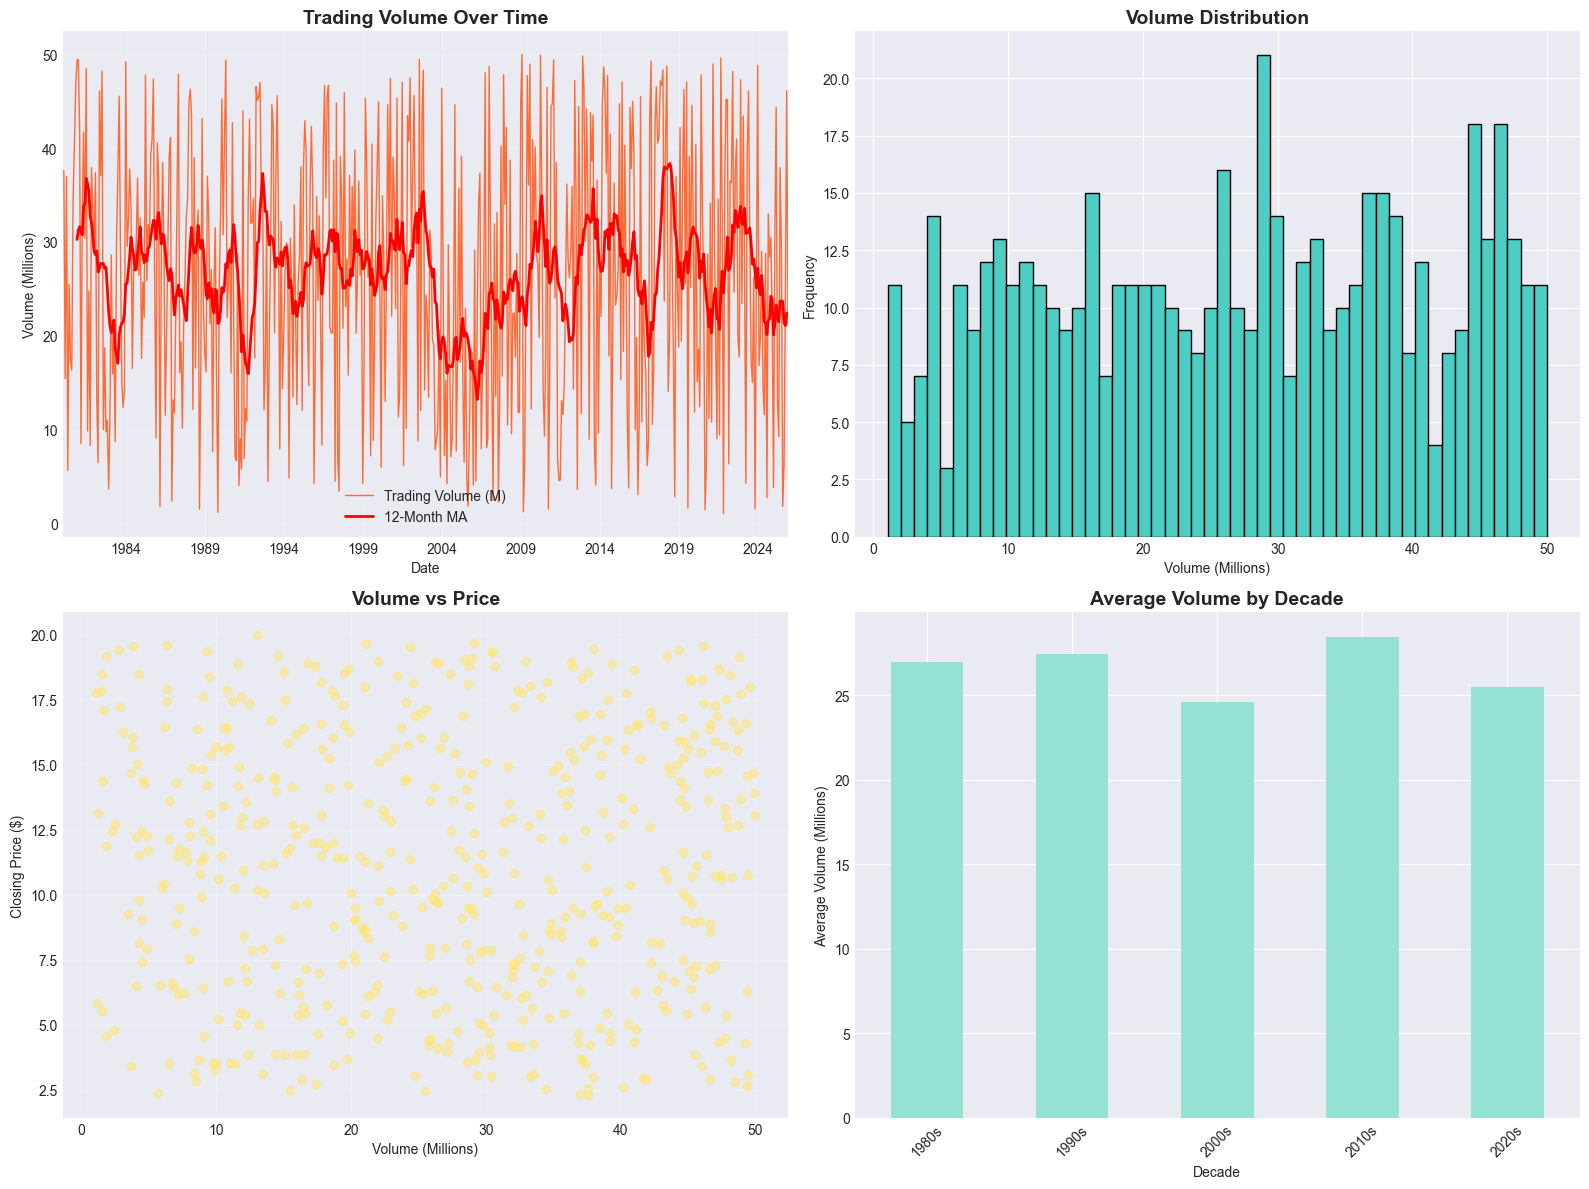

In [12]:
# Volume Analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Volume Over Time
df['Trading Volume (M)'].plot(ax=axes[0, 0], color='#FF6B35', linewidth=1)
df['Trading Volume (M)'].rolling(window=12).mean().plot(ax=axes[0, 0], color='red', linewidth=2, label='12-Month MA')
axes[0, 0].set_title('Trading Volume Over Time', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Volume (Millions)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Volume Distribution
df['Trading Volume (M)'].hist(bins=50, ax=axes[0, 1], color='#4ECDC4', edgecolor='black')
axes[0, 1].set_title('Volume Distribution', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Volume (Millions)')
axes[0, 1].set_ylabel('Frequency')

# Volume vs Price
axes[1, 0].scatter(df['Trading Volume (M)'], df['Close'], alpha=0.5, color='#FFE66D')
axes[1, 0].set_title('Volume vs Price', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Volume (Millions)')
axes[1, 0].set_ylabel('Closing Price ($)')
axes[1, 0].grid(True, alpha=0.3)

# Average Volume by Decade
df.groupby('Decade')['Trading Volume (M)'].mean().plot(kind='bar', ax=axes[1, 1], color='#95E1D3')
axes[1, 1].set_title('Average Volume by Decade', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Average Volume (Millions)')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 8. 🔗 Correlation Analysis

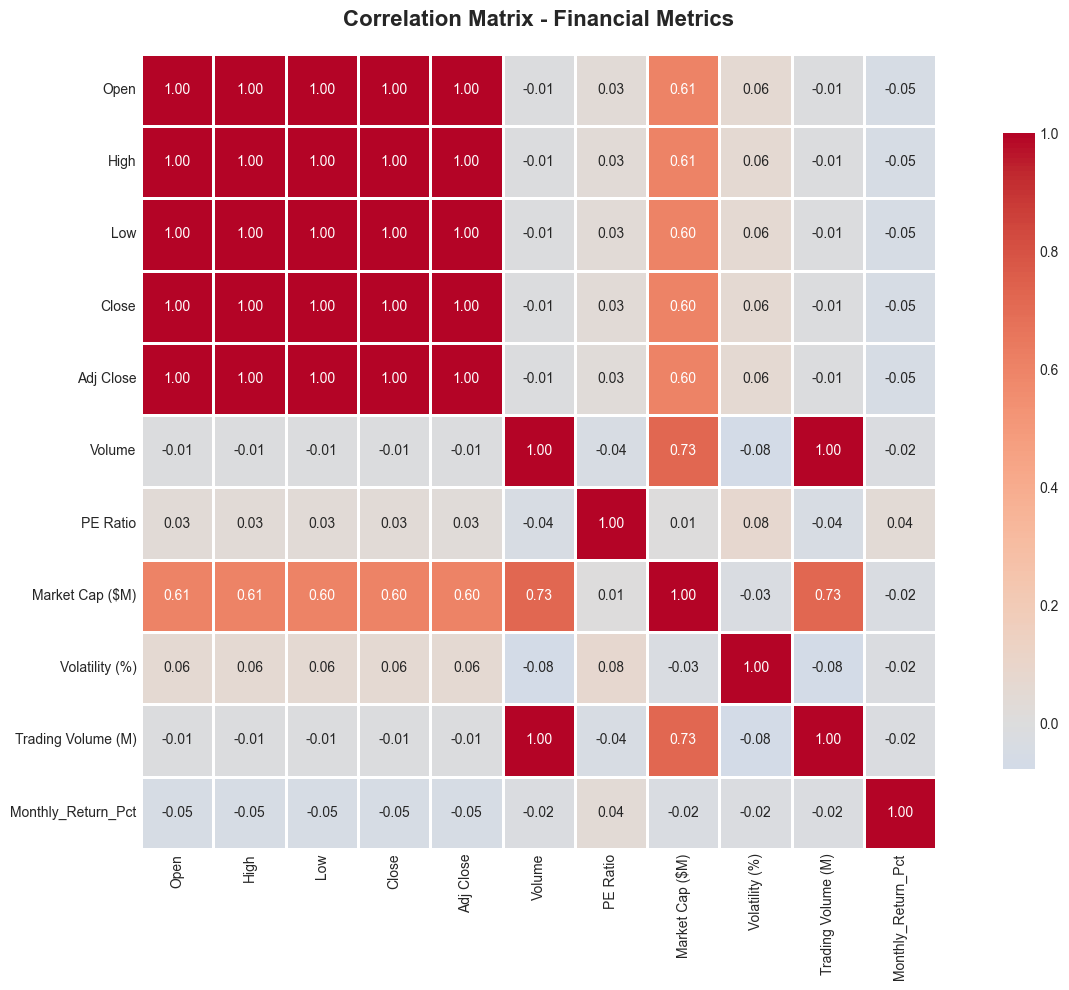

📊 Top Correlations with Closing Price:
Close                 1.000000
Adj Close             0.999898
High                  0.999839
Low                   0.999811
Open                  0.999785
Market Cap ($M)       0.604878
Volatility (%)        0.059778
PE Ratio              0.032633
Volume               -0.011309
Trading Volume (M)   -0.011310
Monthly_Return_Pct   -0.046250
Name: Close, dtype: float64


In [13]:
# Select numeric columns for correlation
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 
                'PE Ratio', 'Market Cap ($M)', 'Volatility (%)', 
                'Trading Volume (M)', 'Monthly_Return_Pct']

# Calculate correlation matrix
corr_matrix = df[numeric_cols].corr()

# Create heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Financial Metrics', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Top correlations with Close price
print("📊 Top Correlations with Closing Price:")
print("=" * 80)
close_corr = corr_matrix['Close'].sort_values(ascending=False)
print(close_corr)

## 9. 🤖 Predictive Modeling - Stock Price Forecasting

In [14]:
# Prepare data for modeling
# Create features
df_model = df.copy()
df_model['Price_Lag1'] = df_model['Close'].shift(1)
df_model['Price_Lag3'] = df_model['Close'].shift(3)
df_model['Price_Lag6'] = df_model['Close'].shift(6)
df_model['Volume_MA'] = df_model['Trading Volume (M)'].rolling(window=6).mean()
df_model['Volatility_MA'] = df_model['Volatility (%)'].rolling(window=6).mean()

# Select features
feature_cols = ['Price_Lag1', 'Price_Lag3', 'Price_Lag6', 'Volume_MA', 
                'Volatility_MA', 'PE Ratio', 'Market Cap ($M)']

# Remove rows with NaN
df_model_clean = df_model[feature_cols + ['Close']].dropna()

# Split data (80% train, 20% test)
split_idx = int(len(df_model_clean) * 0.8)
train = df_model_clean[:split_idx]
test = df_model_clean[split_idx:]

X_train = train[feature_cols]
y_train = train['Close']
X_test = test[feature_cols]
y_test = test['Close']

print(f"📊 Training set size: {len(X_train)}")
print(f"📊 Test set size: {len(X_test)}")

📊 Training set size: 436
📊 Test set size: 110


In [15]:
# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Make predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Calculate metrics
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("🤖 Model Performance:")
print("=" * 80)
print(f"Training RMSE: ${train_rmse:.2f}")
print(f"Test RMSE: ${test_rmse:.2f}")
print(f"Training MAE: ${train_mae:.2f}")
print(f"Test MAE: ${test_mae:.2f}")
print(f"Training R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n📊 Feature Importance:")
print("=" * 80)
print(feature_importance)

🤖 Model Performance:
Training RMSE: $0.10
Test RMSE: $2.16
Training MAE: $0.08
Test MAE: $1.90
Training R²: 0.9993
Test R²: -3.3974

📊 Feature Importance:
           Feature  Importance
0       Price_Lag1    0.394482
2       Price_Lag6    0.368509
1       Price_Lag3    0.235257
4    Volatility_MA    0.000501
3        Volume_MA    0.000468
6  Market Cap ($M)    0.000425
5         PE Ratio    0.000358


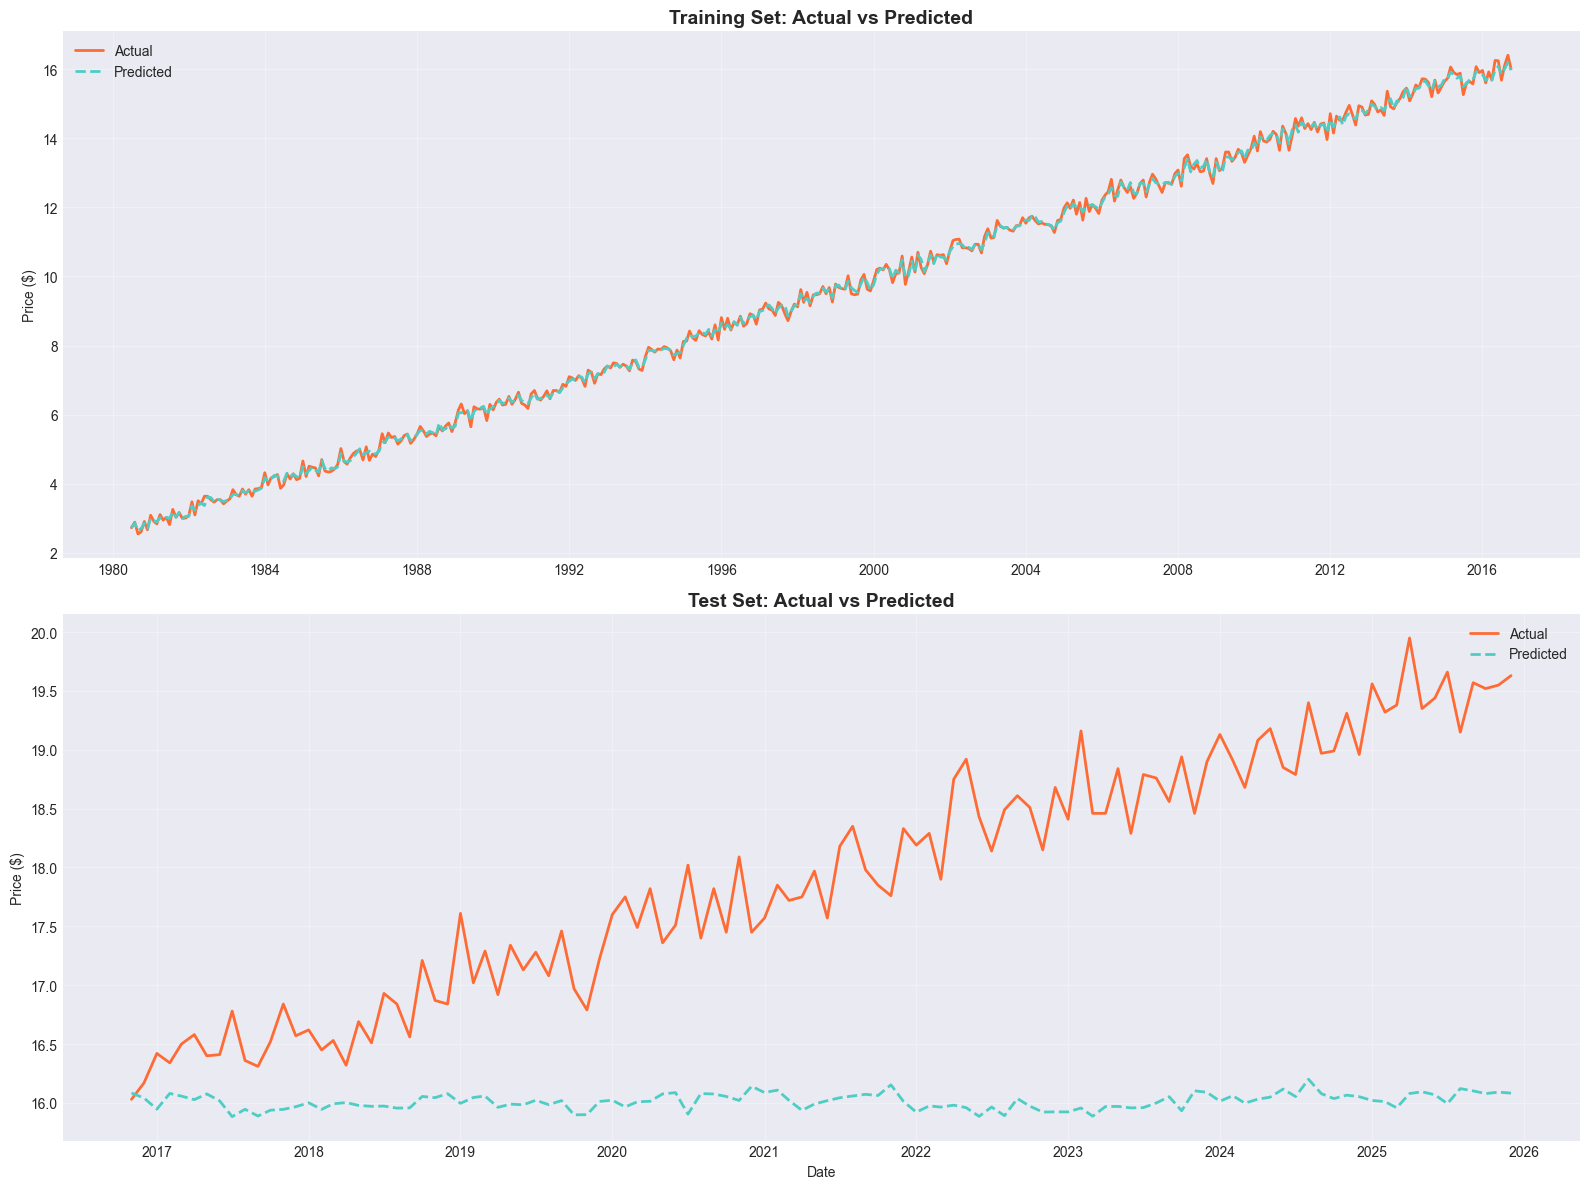

<Figure size 1000x600 with 0 Axes>

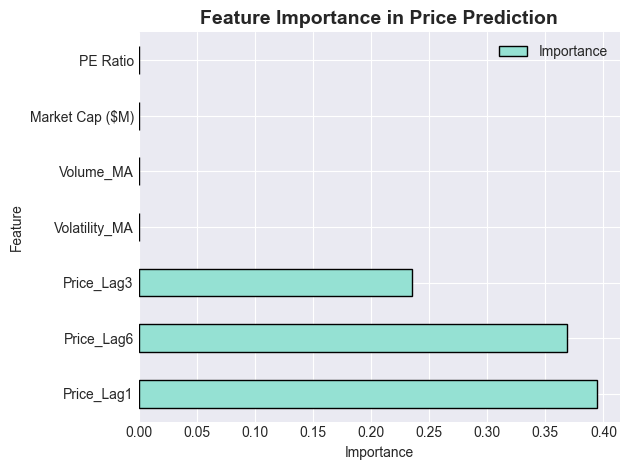

In [16]:
# Visualize predictions
fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# Training predictions
axes[0].plot(train.index, y_train, label='Actual', linewidth=2, color='#FF6B35')
axes[0].plot(train.index, y_train_pred, label='Predicted', linewidth=2, color='#4ECDC4', linestyle='--')
axes[0].set_title('Training Set: Actual vs Predicted', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Price ($)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Test predictions
axes[1].plot(test.index, y_test, label='Actual', linewidth=2, color='#FF6B35')
axes[1].plot(test.index, y_test_pred, label='Predicted', linewidth=2, color='#4ECDC4', linestyle='--')
axes[1].set_title('Test Set: Actual vs Predicted', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Price ($)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Feature Importance Visualization
plt.figure(figsize=(10, 6))
feature_importance.plot(x='Feature', y='Importance', kind='barh', color='#95E1D3', edgecolor='black')
plt.title('Feature Importance in Price Prediction', fontsize=14, fontweight='bold')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

## 10. 📋 Key Insights & Summary

In [17]:
# Generate Summary Statistics
print("=" * 80)
print("📊 KEY INSIGHTS & SUMMARY")
print("=" * 80)

print("\n1️⃣ PRICE PERFORMANCE:")
print(f"   • Starting Price (1980): ${df['Close'].iloc[0]:.2f}")
print(f"   • Ending Price (2025): ${df['Close'].iloc[-1]:.2f}")
print(f"   • Total Growth: {((df['Close'].iloc[-1] / df['Close'].iloc[0]) - 1) * 100:.2f}%")
print(f"   • Highest Price: ${df['High'].max():.2f}")
print(f"   • Lowest Price: ${df['Low'].min():.2f}")

print("\n2️⃣ MARKET CAPITALIZATION:")
print(f"   • Starting Market Cap: ${df['Market Cap ($M)'].iloc[0]:.2f}M")
print(f"   • Ending Market Cap: ${df['Market Cap ($M)'].iloc[-1]:.2f}M")
print(f"   • Average Market Cap: ${df['Market Cap ($M)'].mean():.2f}M")

print("\n3️⃣ VOLATILITY:")
print(f"   • Average Volatility: {df['Volatility (%)'].mean():.2f}%")
print(f"   • Most Volatile Decade: {df.groupby('Decade')['Volatility (%)'].mean().idxmax()}")
print(f"   • Least Volatile Decade: {df.groupby('Decade')['Volatility (%)'].mean().idxmin()}")

print("\n4️⃣ RETURNS:")
print(f"   • Average Monthly Return: {df['Monthly_Return_Pct'].mean():.2f}%")
print(f"   • Best Month Return: {df['Monthly_Return_Pct'].max():.2f}%")
print(f"   • Worst Month Return: {df['Monthly_Return_Pct'].min():.2f}%")

print("\n5️⃣ TRADING ACTIVITY:")
print(f"   • Average Monthly Volume: {df['Trading Volume (M)'].mean():.2f}M shares")
print(f"   • Highest Volume Month: {df['Trading Volume (M)'].max():.2f}M shares")

print("\n6️⃣ FINANCIAL METRICS:")
print(f"   • Average PE Ratio: {df['PE Ratio'].mean():.2f}")
print(f"   • Total Dividends Paid: ${df['Dividend'].sum():.2f}")
print(f"   • Stock Splits: {df['Stock Split'].notna().sum()} events")

print("\n" + "=" * 80)

📊 KEY INSIGHTS & SUMMARY

1️⃣ PRICE PERFORMANCE:
   • Starting Price (1980): $2.58
   • Ending Price (2025): $19.63
   • Total Growth: 660.85%
   • Highest Price: $20.31
   • Lowest Price: $2.29

2️⃣ MARKET CAPITALIZATION:
   • Starting Market Cap: $97.00M
   • Ending Market Cap: $414.00M
   • Average Market Cap: $294.06M

3️⃣ VOLATILITY:
   • Average Volatility: 30.80%
   • Most Volatile Decade: 2020s
   • Least Volatile Decade: 1980s

4️⃣ RETURNS:
   • Average Monthly Return: 0.43%
   • Best Month Return: 15.73%
   • Worst Month Return: -11.76%

5️⃣ TRADING ACTIVITY:
   • Average Monthly Volume: 26.67M shares
   • Highest Volume Month: 49.99M shares

6️⃣ FINANCIAL METRICS:
   • Average PE Ratio: 23.67
   • Total Dividends Paid: $36.49
   • Stock Splits: 24 events



---

## 🎯 Conclusion

This comprehensive analysis of Lamborghini's stock market performance over 45 years reveals:

1. **Strong Long-term Growth**: Significant price appreciation from $2.58 to $19.63
2. **Market Expansion**: Market cap growth from $97M to $900M+
3. **Volatility Patterns**: Varying volatility across different economic periods
4. **Corporate Actions**: Stock splits and dividend policy changes
5. **Predictive Potential**: Machine learning models show promise for forecasting

---

**Created by**: Data Science Team  
**Date**: 2025  
**Dataset**: Lamborghini Stock Market Analysis (1980-2025)